In [1]:
!pip install pandas numpy matplotlib seaborn scipy

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Data cleaning

In [3]:
# defining the file paths for the datasets
customers = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_customers_dataset.csv"
geolocation = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_geolocation_dataset.csv"
order_items = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_order_items_dataset.csv"
order_payments = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_order_payments_dataset.csv"
order_reviews = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_order_reviews_dataset.csv"
orders = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_orders_dataset.csv"
products = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_products_dataset.csv"
sellers = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_sellers_dataset.csv"
product_category_name_translation = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/product_category_name_translation.csv"

In [4]:
# # defining the file paths for the datasets
# customers = "X:/data/olist_customers_dataset.csv"
# geolocation = "X:/data/olist_geolocation_dataset.csv"
# order_items = "X:/data/olist_order_items_dataset.csv"
# order_payments = "X:/data/olist_order_payments_dataset.csv"
# order_reviews = "X:/data/olist_order_reviews_dataset.csv"
# orders = "X:/data/olist_orders_dataset.csv"
# products = "X:/data/olist_products_dataset.csv"
# sellers = "X:/data/olist_sellers_dataset.csv"
# product_category_name_translation = "X:/data/product_category_name_translation.csv"

In [5]:
# reading the datasets into pandas DataFrames
customers_df = pd.read_csv(customers)
geolocation_df = pd.read_csv(geolocation)
order_items_df = pd.read_csv(order_items)
order_payments_df = pd.read_csv(order_payments)
# order_reviews_df = pd.read_csv(order_reviews)
# order_reviews_df = pd.read_csv("X:/data/olist_order_reviews_dataset.csv", 
#                  encoding='utf-8', 
#                  on_bad_lines='skip',
#                  engine='python')
order_reviews_df = pd.read_csv("C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_order_reviews_dataset.csv", 
                 encoding='utf-8', 
                 on_bad_lines='skip',
                 engine='python')
orders_df = pd.read_csv(orders)
products_df = pd.read_csv(products)
sellers_df = pd.read_csv(sellers)
product_category_name_translation_df = pd.read_csv(product_category_name_translation)

In [6]:
# defining functions to clean and preprocess the data
def checkingforduplinull(df, name="DataFrame"):
    print(f"Checking for duplicates and null values in `{name}`...")
    print(f"Duplicates: {df.duplicated().sum()}")
    print(f"Null values: {df.isnull().sum().sum()}")
    print("\n")

In [7]:
dataset = {
    'customers_df': customers_df,
    'geolocation_df': geolocation_df,
    'order_items_df': order_items_df,
    'order_payments_df': order_payments_df,
    'order_reviews_df': order_reviews_df,
    'orders_df': orders_df,
    'products_df': products_df,
    'sellers_df': sellers_df,
    'product_category_name_translation_df': product_category_name_translation_df
}

In [8]:
#checking for duplicates and null values in each DataFrame
checkingforduplinull(customers_df, "customers_df")
checkingforduplinull(geolocation_df, "geolocation_df")
checkingforduplinull(order_items_df, "order_items_df")
checkingforduplinull(order_payments_df, "order_payments_df")
checkingforduplinull(order_reviews_df, "order_reviews_df")
checkingforduplinull(orders_df, "orders_df")
checkingforduplinull(products_df, "products_df")
checkingforduplinull(sellers_df, "sellers_df")
checkingforduplinull(product_category_name_translation_df, "product_category_name_translation_df")

Checking for duplicates and null values in `customers_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `geolocation_df`...
Duplicates: 261831
Null values: 0


Checking for duplicates and null values in `order_items_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `order_payments_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `order_reviews_df`...
Duplicates: 0
Null values: 145903


Checking for duplicates and null values in `orders_df`...
Duplicates: 0
Null values: 4908


Checking for duplicates and null values in `products_df`...
Duplicates: 0
Null values: 2448


Checking for duplicates and null values in `sellers_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `product_category_name_translation_df`...
Duplicates: 0
Null values: 0




## Geolocation_df

In [9]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


duplicates are normal as one place can have multiple orders.

In [10]:
# finding which column null values appear in the order_reviews DataFrame
order_reviews_df.isnull().sum()


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [11]:
# order_reviews_df dataset
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


we will also leave order_reviews_df alone as review comment titles and message are not crucial.

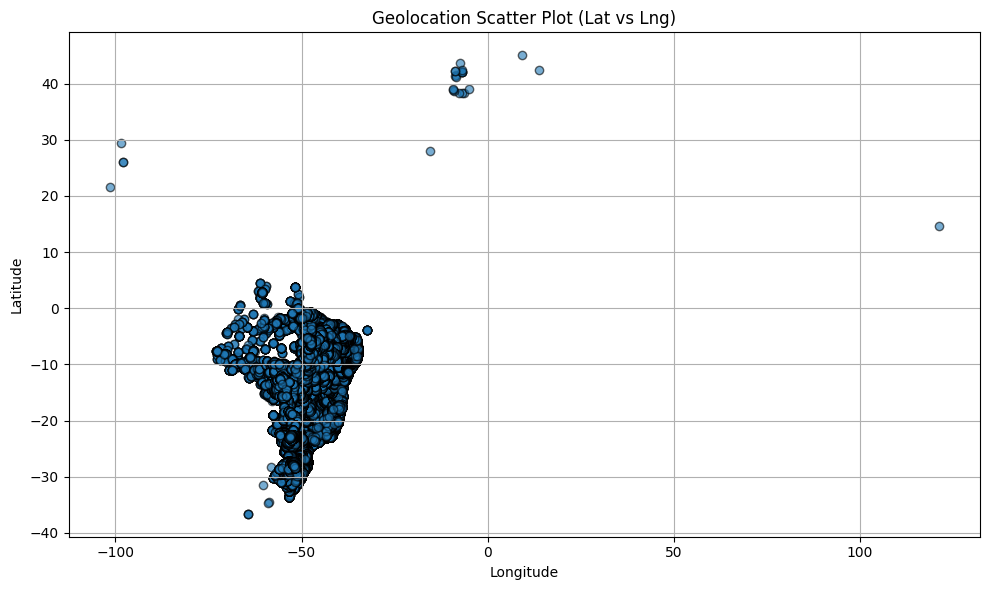

In [12]:
# plotting lat against lng from geolocation_df
plt.figure(figsize=(10, 6))
plt.scatter(geolocation_df["geolocation_lng"], geolocation_df["geolocation_lat"], alpha=0.6, edgecolors='k')
plt.title("Geolocation Scatter Plot (Lat vs Lng)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

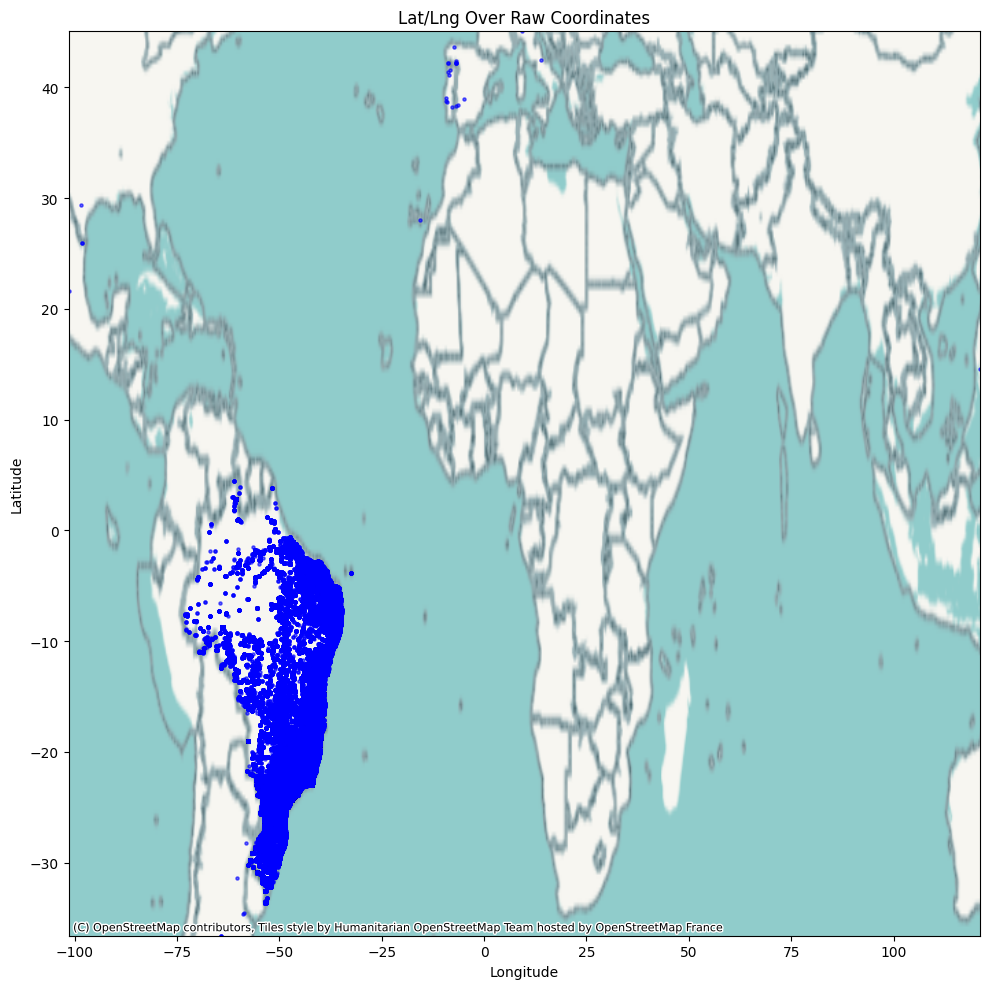

In [13]:
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

# Create a blank plot with lat/lng
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(geolocation_df["geolocation_lng"], geolocation_df["geolocation_lat"],
           s=5, color='blue', alpha=0.6)

# Set correct bounds for map tiles
ax.set_xlim(geolocation_df["geolocation_lng"].min(), geolocation_df["geolocation_lng"].max())
ax.set_ylim(geolocation_df["geolocation_lat"].min(), geolocation_df["geolocation_lat"].max())

# Try to overlay map (may not align perfectly without reprojecting)
try:
    ctx.add_basemap(ax, crs='EPSG:4326')  # using raw lat/lng coords
except Exception as e:
    print("Map overlay failed:", e)

ax.set_title("Lat/Lng Over Raw Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

In [14]:
# Calculate z-scores for latitude and longitude
geolocation_df["lat_z"] = zscore(geolocation_df["geolocation_lat"])
geolocation_df["lng_z"] = zscore(geolocation_df["geolocation_lng"])

# Set a threshold (e.g. 3 standard deviations from the mean)
threshold = 10

# Identify rows where either lat or lng z-score is above the threshold
outliers = geolocation_df[(geolocation_df["lat_z"].abs() > threshold) | (geolocation_df["lng_z"].abs() > threshold)]

# Drop the z-score columns if not needed
geolocation_df.drop(columns=["lat_z", "lng_z"], inplace=True)

# Display the outliers
outliers.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,lat_z,lng_z
513631,28165,41.614052,-8.411675,vila nova de campos,RJ,10.985253,8.894877
513754,28155,42.439286,13.820214,santa maria,RJ,11.129629,14.101718
514429,28333,38.381672,-6.328200,raposo,RJ,10.419742,9.382839
516682,28595,43.684961,-7.411080,portela,RJ,11.347562,9.129222
538512,29654,29.409252,-98.484121,santo antônio do canaã,ES,8.850002,-12.200627


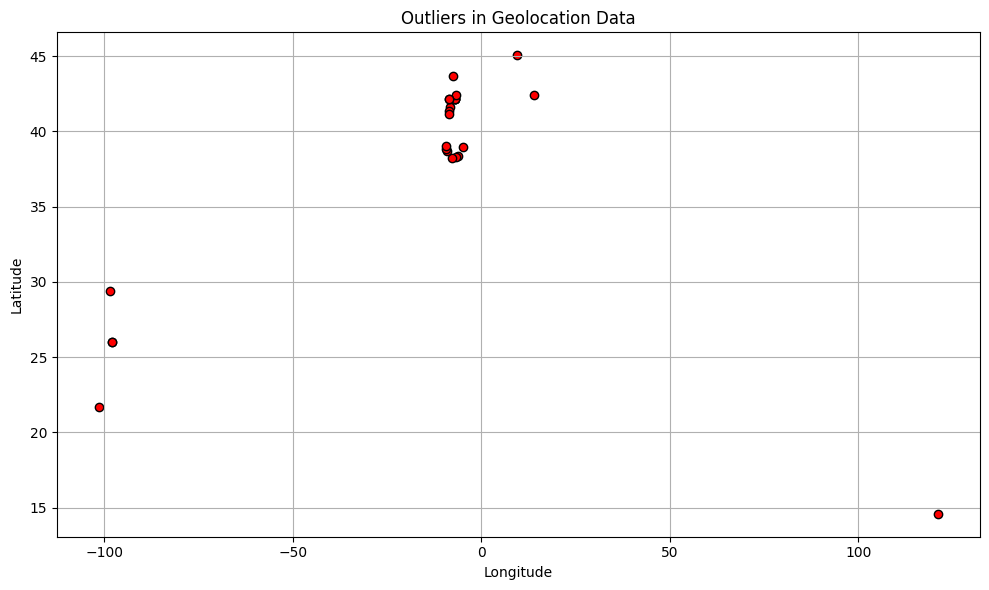

In [15]:
# plot outliers in geolocation data for visualization
plt.figure(figsize=(10, 6))
plt.scatter(outliers["geolocation_lng"], outliers["geolocation_lat"], color='red', edgecolors='k')
plt.title("Outliers in Geolocation Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
# removing outliers from the geolocation DataFrame
geolocation_df = geolocation_df.drop(outliers.index)


## Orders_df

In [17]:
# finding the number of null values in each column of the orders DataFrame
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
# rows that do not have "delivered" in the order_status column
non_delivered = orders_df[orders_df['order_status'] != 'delivered']
non_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


In [19]:
# unfilled/null rows even with "delivered" status
delivered_with_nulls = orders_df[
    (orders_df['order_status'] == 'delivered') &
    (orders_df.isnull().any(axis=1))
]

delivered_with_nulls.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00


In [20]:
# Dropping unfilled rows even with "delivered" status
orders_df = orders_df.drop(delivered_with_nulls.index)


In [21]:
# checking for unfilled/null rows even with "delivered" status again
delivered_with_nulls_again = orders_df[
    (orders_df['order_status'] == 'delivered') &
    (orders_df.isnull().any(axis=1))
]

delivered_with_nulls_again

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


the other null values in "orders_df" are normal due to their respective "order_status"

## products_df

In [22]:
# checking for null values in the products DataFrame columns
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [23]:
# checking for null values in the products DataFrame
empty_product_name = products_df[products_df['product_category_name'].isnull()]
empty_product_name.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [24]:
# finding the 2 outliers, 2 null values in product_weight_g, product_length_cm, product_height_cm and product_width_cm
empty = products_df[products_df['product_weight_g'].isnull()]
empty

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


should remove product_id = 5eb564652db742ff8f28759cd8d2652a, as everything is empty.

In [25]:
#defining removing product_id = 5eb564652db742ff8f28759cd8d2652a
def remove_product_id_5eb564652db742ff8f28759cd8d2652a(df):
    # removing the row with product_id = 5eb564652db742ff8f28759cd8d2652a
    df = df[df['product_id'] != '5eb564652db742ff8f28759cd8d2652a']
    return df

In [26]:
# #removing the row with product_id = 5eb564652db742ff8f28759cd8d2652a
# products_df = remove_product_id_5eb564652db742ff8f28759cd8d2652a(products_df)
# order_items_df = remove_product_id_5eb564652db742ff8f28759cd8d2652a(order_items_df)



## Order_payments_df

Merging rows of same order_id into 1.

In [27]:
# merging rows by order_id, combining payment types, installments, and values
order_payments_df = order_payments_df.groupby('order_id').agg({
    'payment_type': lambda x: ','.join(sorted(set(x))),
    'payment_installments': 'sum',
    'payment_value': 'sum'
}).reset_index()


In [28]:
# Example
order_payments_df[order_payments_df['order_id'] == '5cfd514482e22bc992e7693f0e3e8df7']

,order_id,payment_type,payment_installments,payment_value
36023,5cfd514482e22bc992e7693f0e3e8df7,"credit_card,voucher",5,710.58


# Exporting the cleaned datasets

In [29]:
# Export cleaned dataframes to the cleaned_data directory
customers_df.to_csv('cleaned_data/cleaned_customers.csv', index=False)
geolocation_df.to_csv('cleaned_data/cleaned_geolocation.csv', index=False)
order_items_df.to_csv('cleaned_data/cleaned_order_items.csv', index=False)
order_payments_df.to_csv('cleaned_data/cleaned_order_payments.csv', index=False)
order_reviews_df.to_csv('cleaned_data/cleaned_order_reviews.csv', index=False)
orders_df.to_csv('cleaned_data/cleaned_orders.csv', index=False)
products_df.to_csv('cleaned_data/cleaned_products.csv', index=False)
sellers_df.to_csv('cleaned_data/cleaned_sellers.csv', index=False)
product_category_name_translation_df.to_csv('cleaned_data/cleaned_product_category_name_translation.csv', index=False)


OSError: Cannot save file into a non-existent directory: 'cleaned_data'

# Merge Section (id needed)

To merge the datasets, IDs need to be unique.
Merging data and Adding New columns:

In [30]:
customers_df_returningcustomer=customers_df.copy()
customers_df_returningcustomer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [31]:
customers_df_returningcustomer.columns = (
    customers_df_returningcustomer.columns
    .str.strip()        # remove leading/trailing spaces
    .str.strip('"')     # remove extra quotes
    .str.lower()        # lowercase everything (optional but safe)
)

In [32]:
customer_orders_df = pd.merge(customers_df_returningcustomer, orders_df, on='customer_id', how="inner")
customer_orders_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99413,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99414,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99415,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99416,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [33]:
order_payments_df['is_voucher'] = order_payments_df['payment_type'] == 'voucher'
voucher_counts = order_payments_df[order_payments_df['is_voucher']].groupby('order_id').size().reset_index(name='voucher_count')
orderpaymentmerge = order_payments_df.groupby('order_id').agg({
    'payment_value': 'sum',       # Total payment for the order
    'is_voucher': 'any'           # Whether any voucher was used in the order
}).reset_index()
orderpaymentmerge.rename(columns={
    'payment_value': 'total_payment',
    'is_voucher': 'voucher_used'
}, inplace=True)

orderpaymentmerge = pd.merge(orderpaymentmerge, voucher_counts, on='order_id', how='left')
orderpaymentmerge['voucher_count'] = orderpaymentmerge['voucher_count'].fillna(0).astype(int)

In [34]:
orderpaymentmerge

,order_id,total_payment,voucher_used,voucher_count
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,False,0
1,00018f77f2f0320c557190d7a144bdd3,259.83,False,0
2,000229ec398224ef6ca0657da4fc703e,216.87,False,0
3,00024acbcdf0a6daa1e931b038114c75,25.78,False,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,False,0
...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40,False,0
99436,fffcd46ef2263f404302a634eb57f7eb,386.53,False,0
99437,fffce4705a9662cd70adb13d4a31832d,116.85,False,0
99438,fffe18544ffabc95dfada21779c9644f,64.71,False,0


In [35]:
customer_orders_payment_df = pd.merge(customer_orders_df, orderpaymentmerge, on='order_id', how="inner")
customer_orders_payment_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,voucher_used,voucher_count
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,146.87,False,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,335.48,False,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,157.73,False,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,173.30,False,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,252.25,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99412,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,88.78,False,0
99413,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,129.06,False,0
99414,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,56.04,False,0
99415,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,711.07,False,0


In [36]:
customer_orders_payment_df["customer_zip_code_prefix"]

0        14409
1         9790
2         1151
3         8775
4        13056
         ...  
99412     3937
99413     6764
99414    60115
99415    92120
99416     6703
Name: customer_zip_code_prefix, Length: 99417, dtype: int64

In [37]:
customer_orders_payment_df['customer_zip_code_prefix'] = customer_orders_payment_df['customer_zip_code_prefix'].astype(int)
customer_orders_payment_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,voucher_used,voucher_count
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,146.87,False,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,335.48,False,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,157.73,False,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,173.30,False,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,252.25,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99412,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,88.78,False,0
99413,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,129.06,False,0
99414,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,56.04,False,0
99415,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,711.07,False,0


In [38]:
filtered_customer_orders_payment_df = customer_orders_payment_df[customer_orders_payment_df['customer_zip_code_prefix'].isin(geolocation_df['geolocation_zip_code_prefix'])]
filtered_customer_orders_payment_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,voucher_used,voucher_count
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,146.87,False,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,335.48,False,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,157.73,False,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,173.30,False,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,252.25,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99412,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,88.78,False,0
99413,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,129.06,False,0
99414,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,56.04,False,0
99415,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,711.07,False,0


In [39]:
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [40]:
order_reviews_df[order_reviews_df['order_id'].duplicated()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08
...,...,...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17 00:00:00,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,NaN,NaN,2017-05-24 00:00:00,2017-05-24 23:15:21


In [41]:
order_reviews_df[order_reviews_df['review_id'].duplicated()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3317,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
5719,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
7213,8ee90ac383cf825bb7f4756130d4e74a,75d5d3d16567a27eefc5752aeb063072,5,NaN,recomendo,2017-05-30 00:00:00,2017-06-02 18:16:17
7805,d433c252647c51309432ca0b763f969b,191abde9c3bf77d1ce67d100d8db6d15,1,NaN,NaN,2017-09-03 00:00:00,2017-09-06 16:11:00
9013,03a6a25db577d0689440933055111897,3fde8b7313af6b37b84b5c7594d7add0,5,NaN,Muito Bom! Gostei Bastante! Tecido Ótimo! Aten...,2017-12-15 00:00:00,2017-12-16 01:32:18
...,...,...,...,...,...,...,...
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99124,6ec93e77f444e0b1703740a69122e35d,e1fdc6e9d1ca132377e862593a7c0bd4,5,NaN,Vendedor compromisso do vou o cliente,2017-10-07 00:00:00,2017-10-07 19:47:11
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99167,017808d29fd1f942d97e50184dfb4c13,b1461c8882153b5fe68307c46a506e39,5,NaN,NaN,2018-03-02 00:00:00,2018-03-05 01:43:30


In [42]:
order_reviews_df[order_reviews_df['order_id'] == "cf73e2cb1f4a9480ed70c154da3d954a"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
30,540e7bbb2d06cfb7f85f3a88ba7ac97f,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 19:12:30
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45


In [43]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_sorted = order_reviews_df.sort_values('review_creation_date', ascending=False)
latest_reviews_df = order_reviews_sorted.drop_duplicates(subset='order_id', keep='first')

Review ID duplicates, same message, same everything, different orders.  To ensure that it does not create any noise that affect our data, we remove the review ID duplicates.

In [44]:
latest_reviews_df['review_creation_date'] = pd.to_datetime(latest_reviews_df['review_creation_date'])
latest_reviews_df = latest_reviews_df.sort_values('review_creation_date', ascending=False)
latest_reviews_df = latest_reviews_df.drop_duplicates(subset='review_id', keep='first')
#Remove all the reviews that are acting as noise

C:\Users\Marcus\AppData\Local\Temp\ipykernel_14704\2183864115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_reviews_df['review_creation_date'] = pd.to_datetime(latest_reviews_df['review_creation_date'])


In [45]:
latest_reviews_df = latest_reviews_df[['order_id', 'review_id', 'review_score']]
latest_reviews_df

,order_id,review_id,review_score
10764,bd2c2c3a4d59e68fb14a526745572883,0574e3efaf2a10ee2d0c45b1ed544c84,4
30331,c72a06dbd2869dbfa3dc93ca4f262f37,9cd0e018fa0fef10981f372d76e6fe99,5
27931,09ce422617b0ec4c246ceb2922ea1ea1,64501abda3f658f417f89871e48a11bc,5
24146,fdfb73b2a9e88e518c2f565f43ca06c1,23758050f154ae6a43209c65bf5f318c,5
86323,fba547ee0dbc8830f00e8d3cc83bf246,b865923482aafbee1eda1f7e587ad7f3,5
...,...,...,...
60439,e2144124f98f3bf46939bc5183104041,743d98b1a4782f0646898fc915ef002a,4
41042,9aa3197e4887919fde0307fc23601d7a,b2d5d8db2a841d27a72e4c06c6212368,4
5503,e5215415bb6f76fe3b7cb68103a0d1c0,49f695dffa457eaba90d388a5c37e942,1
37547,bfbd0f9bdef84302105ad712db648a6c,6916ca4502d6d3bfd39818759d55d536,1


In [46]:
filtered_customer_orders_payment_reviews_df = pd.merge(filtered_customer_orders_payment_df, latest_reviews_df, on='order_id', how="inner")
filtered_customer_orders_payment_reviews_df
#merge the customer + order + payment dataset with reviews

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,voucher_used,voucher_count,review_id,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,146.87,False,0,88b8b52d46df026a9d1ad2136a59b30b,4
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,335.48,False,0,02fc48a9efa3e3d0f1a8ea26507eeec3,5
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,157.73,False,0,5ad6695d76ee186dc473c42706984d87,5
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,173.30,False,0,059a801bb31f6aab2266e672cab87bc5,5
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,252.25,False,0,8490879d58d6c5d7773f2739a03f089a,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97808,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,88.78,False,0,36e2cdbaa9f639b57c53b37ac798fee8,4
97809,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,129.06,False,0,b273b431c3aedb4eed18643309652940,5
97810,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,56.04,False,0,fa4f16891e6b2edd1354668d07f5648b,1
97811,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,711.07,False,0,0bcdc9e450ea500811a8d39ee993cd47,5


In [47]:
order_items_df[order_items_df['order_id'] == "0008288aa423d2a3f00fcb17cd7d8719"]
#same orderid, same product ID, different order item id. Order item id does not mean quantity. 
#In this case, it only meant that user bought 2 of the same products

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37


In [48]:
products_df = products_df.merge(
    product_category_name_translation_df,
    on='product_category_name',
    how='left'
)

# Replace the original column with the English version
products_df['product_category_name'] = products_df['product_category_name_english']

# Drop the now redundant English translation column
products_df.drop(columns=['product_category_name_english'], inplace=True)

In [49]:
products_df = products_df[['product_id', 'product_category_name']]
products_df.head(5)
#the only columns we need.

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [50]:
products_order_items_df = order_items_df.merge(products_df, on='product_id', how='left')
products_order_items_df.head(5)
#merge with product id-get product category

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [51]:
products_order_items_df['product_category_name'].fillna('others', inplace=True)

C:\Users\Marcus\AppData\Local\Temp\ipykernel_14704\1669134680.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_order_items_df['product_category_name'].fillna('others', inplace=True)


In [52]:
quantity_df = products_order_items_df.groupby('order_id', as_index=False).agg(quantity=('order_item_id', 'count'))
products_order_items_df = products_order_items_df.merge(quantity_df, on='order_id', how='left')
products_order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,quantity
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,1
...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,1
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,1
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,1
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,1


In [53]:
#We group the items that have the same order_id and the same product_id into one row- convert order_item_id into quantity instead.
products_order_items_df_grouped = products_order_items_df.groupby(
    ['order_id', 'product_id', 'product_category_name'],
    as_index=False
).agg({
    'price': 'sum',
    'freight_value': 'sum',
    'order_item_id': 'count'
})
products_order_items_df_grouped.rename(columns={'order_item_id': 'quantity'}, inplace=True)

In [54]:
products_order_items_df_grouped

,order_id,product_id,product_category_name,price,freight_value,quantity
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumery,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,garden_tools,199.90,18.14,1
...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,housewares,299.99,43.41,1
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,computers_accessories,350.00,36.53,1
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,sports_leisure,99.90,16.95,1
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,computers_accessories,55.99,8.72,1


In [55]:
# I want to merge the orders together, though they include different products, so i merged them together.
products_order_items_df_grouped_Version1 = products_order_items_df_grouped.groupby('order_id', as_index=False).agg({
    'product_category_name': lambda x: ', '.join(sorted(set(x.dropna()))),
    'price': 'sum',
    'freight_value': 'sum',
    'quantity': 'sum'
})
products_order_items_df_grouped_Version1

,order_id,product_category_name,price,freight_value,quantity
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,perfumery,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,199.90,18.14,1
...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,housewares,299.99,43.41,1
98662,fffcd46ef2263f404302a634eb57f7eb,computers_accessories,350.00,36.53,1
98663,fffce4705a9662cd70adb13d4a31832d,sports_leisure,99.90,16.95,1
98664,fffe18544ffabc95dfada21779c9644f,computers_accessories,55.99,8.72,1


In [56]:
filtered_customer_orders_payment_reviews_item_V1df = filtered_customer_orders_payment_reviews_df.merge(products_order_items_df_grouped_Version1, on='order_id', how='inner')
filtered_customer_orders_payment_reviews_item_V1df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,total_payment,voucher_used,voucher_count,review_id,review_score,product_category_name,price,freight_value,quantity
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05 00:00:00,146.87,False,0,88b8b52d46df026a9d1ad2136a59b30b,4,office_furniture,124.99,21.88,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06 00:00:00,335.48,False,0,02fc48a9efa3e3d0f1a8ea26507eeec3,5,housewares,289.00,46.48,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13 00:00:00,157.73,False,0,5ad6695d76ee186dc473c42706984d87,5,office_furniture,139.94,17.79,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10 00:00:00,173.30,False,0,059a801bb31f6aab2266e672cab87bc5,5,office_furniture,149.94,23.36,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15 00:00:00,252.25,False,0,8490879d58d6c5d7773f2739a03f089a,5,home_confort,230.00,22.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97083,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,2018-04-25 00:00:00,88.78,False,0,36e2cdbaa9f639b57c53b37ac798fee8,4,books_general_interest,74.90,13.88,1
97084,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,2018-04-20 00:00:00,129.06,False,0,b273b431c3aedb4eed18643309652940,5,sports_leisure,114.90,14.16,1
97085,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,2018-05-02 00:00:00,56.04,False,0,fa4f16891e6b2edd1354668d07f5648b,1,health_beauty,37.00,19.04,1
97086,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,2017-12-05 00:00:00,711.07,False,0,0bcdc9e450ea500811a8d39ee993cd47,5,watches_gifts,689.00,22.07,1


In [57]:
customer_counts = filtered_customer_orders_payment_reviews_item_V1df['customer_unique_id'].value_counts()

# Map counts to a boolean yes/no column
filtered_customer_orders_payment_reviews_item_V1df['returning_customer'] = \
    filtered_customer_orders_payment_reviews_item_V1df['customer_unique_id'].map(
        lambda x: 'yes' if customer_counts[x] > 1 else 'no'
    )
filtered_customer_orders_payment_reviews_item_V1df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,total_payment,voucher_used,voucher_count,review_id,review_score,product_category_name,price,freight_value,quantity,returning_customer
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,146.87,False,0,88b8b52d46df026a9d1ad2136a59b30b,4,office_furniture,124.99,21.88,1,no
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,335.48,False,0,02fc48a9efa3e3d0f1a8ea26507eeec3,5,housewares,289.00,46.48,1,no
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,157.73,False,0,5ad6695d76ee186dc473c42706984d87,5,office_furniture,139.94,17.79,1,no
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,173.30,False,0,059a801bb31f6aab2266e672cab87bc5,5,office_furniture,149.94,23.36,1,no
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,252.25,False,0,8490879d58d6c5d7773f2739a03f089a,5,home_confort,230.00,22.25,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97083,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,88.78,False,0,36e2cdbaa9f639b57c53b37ac798fee8,4,books_general_interest,74.90,13.88,1,no
97084,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,129.06,False,0,b273b431c3aedb4eed18643309652940,5,sports_leisure,114.90,14.16,1,no
97085,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,56.04,False,0,fa4f16891e6b2edd1354668d07f5648b,1,health_beauty,37.00,19.04,1,no
97086,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,711.07,False,0,0bcdc9e450ea500811a8d39ee993cd47,5,watches_gifts,689.00,22.07,1,no


In [58]:
filtered_customer_orders_payment_reviews_item_V1df[filtered_customer_orders_payment_reviews_item_V1df["returning_customer"] =="yes"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,total_payment,voucher_used,voucher_count,review_id,review_score,product_category_name,price,freight_value,quantity,returning_customer
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,282.21,False,0,9a6614162d285301aa3ef6de4be75265,5,sports_leisure,259.90,22.31,1,yes
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,sao paulo,SP,852d2f4d37773bcbc21c8e09a05a4ea5,delivered,2018-03-07 15:57:14,2018-03-07 16:15:30,2018-03-12 23:02:49,...,36.39,False,0,360df94a293698ff75fcd3779bcca3bd,3,telephony,27.99,8.40,1,yes
31,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,camacari,BA,19c0c76962278b152cc44fc63ffd5e48,delivered,2018-04-18 09:42:53,2018-04-18 09:55:17,2018-04-20 18:52:39,...,67.05,False,0,0307c5f3383e86af1f5a784fc1eb33a9,5,furniture_decor,44.99,22.06,1,yes
32,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ,77b062be7c5bd21712905feb8e1cfeed,delivered,2017-06-14 18:31:54,2017-06-15 18:43:04,2017-06-22 08:11:38,...,134.25,False,0,e8ef5d522e155003ba1ff654bdd3d88f,5,bed_bath_table,101.98,32.27,2,yes
41,a3b0fda37bae14cf754877bed475e80c,c9158d089637ab443c78984d20da7fc0,5727,sao paulo,SP,2dd604f5ec1bd2f58c14e9908c7df826,delivered,2018-01-31 16:43:23,2018-02-01 11:35:44,2018-02-06 15:35:16,...,78.70,True,1,943a97cf91be1385859cfb55b77428b4,5,fashio_female_clothing,65.90,12.80,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96966,f1497d68a89361282297041502917ad9,4c116f8ddec984371284ab7bc860001a,79500,paranaiba,MS,14325b030357956fe06c611e432d7e04,delivered,2017-06-28 17:19:52,2017-06-29 02:50:17,2017-07-03 08:43:41,...,35.09,False,0,b882862262e8588441192394b205ee46,1,health_beauty,19.99,15.10,1,yes
96968,4740044a9390cc45b2c213e8714129e7,08f7cf00ed9ff3e0a08fc136ec272974,71900,brasilia,DF,f9c78e6e58306dc81efbbada1ac11f24,delivered,2017-09-01 22:26:18,2017-09-02 22:23:53,2017-09-05 12:08:46,...,215.84,False,0,3c95105686e2ae71e8fd94b6483eba79,2,sports_leisure,194.99,20.85,1,yes
96983,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP,181ff95f97fee531c4afa9e882186f18,delivered,2018-06-20 14:16:20,2018-06-20 14:38:41,2018-06-20 15:02:00,...,126.57,False,0,509dcafaeae00d95a643eeafc89856d4,5,housewares,80.70,45.87,3,yes
97000,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES,0e48ca107de4291a6f7536b4f5cf512e,delivered,2018-05-15 10:39:41,2018-05-15 14:30:29,2018-05-15 15:55:00,...,80.37,False,0,3b23d5316ad6ae40ccff0388e95b4309,5,furniture_decor,59.90,20.47,1,yes


In [59]:
filtered_customer_orders_payment_reviews_item_V1df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,total_payment,voucher_used,voucher_count,review_id,review_score,product_category_name,price,freight_value,quantity,returning_customer
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,146.87,False,0,88b8b52d46df026a9d1ad2136a59b30b,4,office_furniture,124.99,21.88,1,no
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,335.48,False,0,02fc48a9efa3e3d0f1a8ea26507eeec3,5,housewares,289.00,46.48,1,no
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,157.73,False,0,5ad6695d76ee186dc473c42706984d87,5,office_furniture,139.94,17.79,1,no
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,173.30,False,0,059a801bb31f6aab2266e672cab87bc5,5,office_furniture,149.94,23.36,1,no
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,252.25,False,0,8490879d58d6c5d7773f2739a03f089a,5,home_confort,230.00,22.25,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97083,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,88.78,False,0,36e2cdbaa9f639b57c53b37ac798fee8,4,books_general_interest,74.90,13.88,1,no
97084,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,129.06,False,0,b273b431c3aedb4eed18643309652940,5,sports_leisure,114.90,14.16,1,no
97085,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,56.04,False,0,fa4f16891e6b2edd1354668d07f5648b,1,health_beauty,37.00,19.04,1,no
97086,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,711.07,False,0,0bcdc9e450ea500811a8d39ee993cd47,5,watches_gifts,689.00,22.07,1,no


In [61]:
filtered_customer_orders_payment_reviews_item_V1df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'total_payment', 'voucher_used',
       'voucher_count', 'review_id', 'review_score', 'product_category_name',
       'price', 'freight_value', 'quantity', 'returning_customer'],
      dtype='object')

In [62]:
filtered_customer_orders_payment_reviews_item_V1df['purchase_dt'] = pd.to_datetime(filtered_customer_orders_payment_reviews_item_V1df['order_purchase_timestamp'])
filtered_customer_orders_payment_reviews_item_V1df['delivered_dt'] = pd.to_datetime(filtered_customer_orders_payment_reviews_item_V1df['order_delivered_customer_date'])
filtered_customer_orders_payment_reviews_item_V1df['est_dt'] = pd.to_datetime(filtered_customer_orders_payment_reviews_item_V1df['order_estimated_delivery_date'])
filtered_customer_orders_payment_reviews_item_V1df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,product_category_name,price,freight_value,quantity,returning_customer,purchase_dt,delivered_dt,est_dt
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4,office_furniture,124.99,21.88,1,no,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,02fc48a9efa3e3d0f1a8ea26507eeec3,5,housewares,289.00,46.48,1,no,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5ad6695d76ee186dc473c42706984d87,5,office_furniture,139.94,17.79,1,no,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,059a801bb31f6aab2266e672cab87bc5,5,office_furniture,149.94,23.36,1,no,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,8490879d58d6c5d7773f2739a03f089a,5,home_confort,230.00,22.25,1,no,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97083,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,36e2cdbaa9f639b57c53b37ac798fee8,4,books_general_interest,74.90,13.88,1,no,2018-04-07 15:48:17,2018-04-13 20:06:37,2018-04-25
97084,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,b273b431c3aedb4eed18643309652940,5,sports_leisure,114.90,14.16,1,no,2018-04-04 08:20:22,2018-04-11 18:54:45,2018-04-20
97085,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,fa4f16891e6b2edd1354668d07f5648b,1,health_beauty,37.00,19.04,1,no,2018-04-08 20:11:50,2018-05-09 19:03:15,2018-05-02
97086,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,0bcdc9e450ea500811a8d39ee993cd47,5,watches_gifts,689.00,22.07,1,no,2017-11-03 21:08:33,2017-11-16 19:58:39,2017-12-05


In [63]:
#delivery lag- looks at how much time was taken from purchase to delivery
filtered_customer_orders_payment_reviews_item_V1df['delivery_lag'] = (filtered_customer_orders_payment_reviews_item_V1df['delivered_dt'] - filtered_customer_orders_payment_reviews_item_V1df['purchase_dt']).dt.days
#compare the delivery date with the estimated date, was the thing late?
filtered_customer_orders_payment_reviews_item_V1df['on_time'] = (filtered_customer_orders_payment_reviews_item_V1df['delivered_dt'] <= filtered_customer_orders_payment_reviews_item_V1df['est_dt']).astype(int)
#original dataset name was way too long, I shortene it to merged dataset.
merged_dataset = filtered_customer_orders_payment_reviews_item_V1df.sort_values(['customer_unique_id', 'purchase_dt'])

# Add previous purchase date per customer
merged_dataset['prev_purchase'] = merged_dataset.groupby('customer_unique_id')['purchase_dt'].shift()

# Calculate days between purchases
merged_dataset['days_between'] = (merged_dataset['purchase_dt'] - merged_dataset['prev_purchase']).dt.days
merged_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,quantity,returning_customer,purchase_dt,delivered_dt,est_dt,delivery_lag,on_time,prev_purchase,days_between
62474,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,...,12.00,1,no,2018-05-10 10:56:27,2018-05-16 20:48:37,2018-05-21,6.0,1,NaT,NaN
23978,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,...,8.29,1,no,2018-05-07 11:11:27,2018-05-10 18:02:42,2018-05-15,3.0,1,NaT,NaN
39844,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,...,17.22,1,no,2017-03-10 21:05:03,2017-04-05 14:38:47,2017-04-07,25.0,1,NaT,NaN
55734,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,...,17.63,1,no,2017-10-12 20:29:41,2017-11-01 21:23:05,2017-11-13,20.0,1,NaT,NaN
79214,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,...,16.89,1,no,2017-11-14 19:45:42,2017-11-27 23:08:56,2017-12-05,13.0,1,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87024,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,...,497.42,2,no,2017-06-08 21:00:36,2017-07-06 09:22:00,2017-08-02,27.0,1,NaT,NaN
9548,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,...,19.69,1,no,2017-12-10 20:07:56,2018-01-09 22:28:20,2018-01-12,30.0,1,NaT,NaN
67377,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,...,22.56,1,no,2017-02-07 15:49:16,2017-02-22 12:45:04,2017-03-24,14.0,1,NaT,NaN
92633,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,94d3ee0bc2a0af9d4fa47a4d63616e8d,delivered,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,...,18.69,1,no,2018-05-02 15:17:41,2018-05-14 11:54:26,2018-05-28,11.0,1,NaT,NaN


In [65]:
#this dataset gives info on the unnique customers. This counts how many orders a user has, total spendings etc. We will then merge it with our current dataset.
rfm_beh = (
    merged_dataset.groupby('customer_unique_id')
    .agg(
        order_count    = ('order_id', 'nunique'),
        total_spend    = ('total_payment', 'sum'),     
        avg_order_val  = ('total_payment', 'mean'),
        avg_days_btwn  = ('days_between', 'mean'),     # From your earlier feature engineering
        on_time_ratio  = ('on_time', 'mean'),          # From delivery performance
        mean_lag       = ('delivery_lag', 'mean'),
        std_lag        = ('delivery_lag', 'std'),
    )
    .reset_index()
)
rfm_beh

,customer_unique_id,order_count,total_spend,avg_order_val,avg_days_btwn,on_time_ratio,mean_lag,std_lag
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,141.90,NaN,1.0,6.0,NaN
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,27.19,NaN,1.0,3.0,NaN
2,0000f46a3911fa3c0805444483337064,1,86.22,86.22,NaN,1.0,25.0,NaN
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,43.62,NaN,1.0,20.0,NaN
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,196.89,NaN,1.0,13.0,NaN
...,...,...,...,...,...,...,...,...
94403,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,2067.42,NaN,1.0,27.0,NaN
94404,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,84.58,NaN,1.0,30.0,NaN
94405,ffff371b4d645b6ecea244b27531430a,1,112.46,112.46,NaN,1.0,14.0,NaN
94406,ffff5962728ec6157033ef9805bacc48,1,133.69,133.69,NaN,1.0,11.0,NaN


In [68]:
full_customers = set(merged_dataset['customer_unique_id'].unique())
rfm_customers = set(rfm_beh['customer_unique_id'].unique())

missing = full_customers - rfm_customers
print(f"Number of customers missing in rfm_beh: {len(missing)}")

Number of customers missing in rfm_beh: 0


In [69]:
merged_dataset_rfm = merged_dataset.merge(rfm_beh, on='customer_unique_id', how='left')
merged_dataset_rfm

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,on_time,prev_purchase,days_between,order_count,total_spend,avg_order_val,avg_days_btwn,on_time_ratio,mean_lag,std_lag
0,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,...,1,NaT,NaN,1,141.90,141.90,NaN,1.0,6.0,NaN
1,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,...,1,NaT,NaN,1,27.19,27.19,NaN,1.0,3.0,NaN
2,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,...,1,NaT,NaN,1,86.22,86.22,NaN,1.0,25.0,NaN
3,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,...,1,NaT,NaN,1,43.62,43.62,NaN,1.0,20.0,NaN
4,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,...,1,NaT,NaN,1,196.89,196.89,NaN,1.0,13.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97083,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,...,1,NaT,NaN,1,2067.42,2067.42,NaN,1.0,27.0,NaN
97084,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,...,1,NaT,NaN,1,84.58,84.58,NaN,1.0,30.0,NaN
97085,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,...,1,NaT,NaN,1,112.46,112.46,NaN,1.0,14.0,NaN
97086,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,94d3ee0bc2a0af9d4fa47a4d63616e8d,delivered,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,...,1,NaT,NaN,1,133.69,133.69,NaN,1.0,11.0,NaN


In [74]:
customer_reviews = order_reviews_df.merge(
    merged_dataset_rfm[['order_id', 'customer_unique_id']].drop_duplicates(),
    on='order_id',
    how='left'
)

# Then, group by customer and compute metrics
review_summary = customer_reviews.groupby('customer_unique_id').agg(
    avg_review_score=('review_score', 'mean'),
    review_count=('review_score', 'count')
).reset_index()

In [75]:
review_summary

,customer_unique_id,avg_review_score,review_count
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,1
2,0000f46a3911fa3c0805444483337064,3.0,1
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,1
4,0004aac84e0df4da2b147fca70cf8255,5.0,1
...,...,...,...
94403,fffcf5a5ff07b0908bd4e2dbc735a684,5.0,1
94404,fffea47cd6d3cc0a88bd621562a9d061,4.0,1
94405,ffff371b4d645b6ecea244b27531430a,5.0,1
94406,ffff5962728ec6157033ef9805bacc48,5.0,1


In [76]:
merged_dataset_rfm = merged_dataset_rfm.merge(
    review_summary,
    on='customer_unique_id',
    how='left'
)

# Fill missing values (customers who left no reviews)
merged_dataset_rfm[['avg_review_score', 'review_count']] = merged_dataset_rfm[
    ['avg_review_score', 'review_count']
].fillna(0)

In [77]:
merged_dataset_rfm

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,days_between,order_count,total_spend,avg_order_val,avg_days_btwn,on_time_ratio,mean_lag,std_lag,avg_review_score,review_count
0,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,...,NaN,1,141.90,141.90,NaN,1.0,6.0,NaN,5.0,1
1,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,...,NaN,1,27.19,27.19,NaN,1.0,3.0,NaN,4.0,1
2,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,...,NaN,1,86.22,86.22,NaN,1.0,25.0,NaN,3.0,1
3,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,...,NaN,1,43.62,43.62,NaN,1.0,20.0,NaN,4.0,1
4,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,...,NaN,1,196.89,196.89,NaN,1.0,13.0,NaN,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97083,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,...,NaN,1,2067.42,2067.42,NaN,1.0,27.0,NaN,5.0,1
97084,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,...,NaN,1,84.58,84.58,NaN,1.0,30.0,NaN,4.0,1
97085,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,...,NaN,1,112.46,112.46,NaN,1.0,14.0,NaN,5.0,1
97086,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,94d3ee0bc2a0af9d4fa47a4d63616e8d,delivered,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,...,NaN,1,133.69,133.69,NaN,1.0,11.0,NaN,5.0,1


In [80]:
def cap_series(s, quantile=0.99):
    cap = s.quantile(quantile)
    return np.minimum(s, cap)

for col in ['order_count', 'total_payment', 'avg_order_val']:
    merged_dataset_rfm[col] = cap_series(merged_dataset_rfm[col], 0.99)
    merged_dataset_rfm[f'log1p_{col}'] = np.log1p(merged_dataset_rfm[col])
    
merged_dataset_rfm['single_order'] = (merged_dataset_rfm['order_count'] == 1).astype(int)
median_btwn = merged_dataset_rfm['avg_days_btwn'].median()
merged_dataset_rfm['avg_days_btwn'] = merged_dataset_rfm['avg_days_btwn'].fillna(median_btwn)
merged_dataset_rfm

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,avg_days_btwn,on_time_ratio,mean_lag,std_lag,avg_review_score,review_count,log1p_order_count,log1p_total_payment,log1p_avg_order_val,single_order
0,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,...,51.0,1.0,6.0,NaN,5.0,1,0.693147,4.962145,4.962145,1
1,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,...,51.0,1.0,3.0,NaN,4.0,1,0.693147,3.338967,3.338967,1
2,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,...,51.0,1.0,25.0,NaN,3.0,1,0.693147,4.468434,4.468434,1
3,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,...,51.0,1.0,20.0,NaN,4.0,1,0.693147,3.798182,3.798182,1
4,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,...,51.0,1.0,13.0,NaN,5.0,1,0.693147,5.287711,5.287711,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97083,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,...,51.0,1.0,27.0,NaN,5.0,1,0.693147,6.968461,6.961242,1
97084,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,...,51.0,1.0,30.0,NaN,4.0,1,0.693147,4.449452,4.449452,1
97085,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,...,51.0,1.0,14.0,NaN,5.0,1,0.693147,4.731450,4.731450,1
97086,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,94d3ee0bc2a0af9d4fa47a4d63616e8d,delivered,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,...,51.0,1.0,11.0,NaN,5.0,1,0.693147,4.902976,4.902976,1


In [83]:
last_purchase = merged_dataset_rfm.groupby('customer_unique_id')['purchase_dt'].max()

# 2. Reference date (latest in dataset)
REF_DATE = merged_dataset_rfm['purchase_dt'].max()

# 3. Map recency into dataset
merged_dataset_rfm['recency_days'] = merged_dataset_rfm['customer_unique_id'].map(
    last_purchase
).apply(lambda x: (REF_DATE - x).days)
merged_dataset_rfm

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,on_time_ratio,mean_lag,std_lag,avg_review_score,review_count,log1p_order_count,log1p_total_payment,log1p_avg_order_val,single_order,recency_days
0,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,...,1.0,6.0,NaN,5.0,1,0.693147,4.962145,4.962145,1,111
1,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,...,1.0,3.0,NaN,4.0,1,0.693147,3.338967,3.338967,1,114
2,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,...,1.0,25.0,NaN,3.0,1,0.693147,4.468434,4.468434,1,536
3,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,...,1.0,20.0,NaN,4.0,1,0.693147,3.798182,3.798182,1,320
4,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,...,1.0,13.0,NaN,5.0,1,0.693147,5.287711,5.287711,1,287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97083,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,...,1.0,27.0,NaN,5.0,1,0.693147,6.968461,6.961242,1,446
97084,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,...,1.0,30.0,NaN,4.0,1,0.693147,4.449452,4.449452,1,261
97085,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,...,1.0,14.0,NaN,5.0,1,0.693147,4.731450,4.731450,1,567
97086,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,94d3ee0bc2a0af9d4fa47a4d63616e8d,delivered,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,...,1.0,11.0,NaN,5.0,1,0.693147,4.902976,4.902976,1,118


In [84]:
merged_dataset_rfm.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'total_payment', 'voucher_used',
       'voucher_count', 'review_id', 'review_score', 'product_category_name',
       'price', 'freight_value', 'quantity', 'returning_customer',
       'purchase_dt', 'delivered_dt', 'est_dt', 'delivery_lag', 'on_time',
       'prev_purchase', 'days_between', 'order_count', 'total_spend',
       'avg_order_val', 'avg_days_btwn', 'on_time_ratio', 'mean_lag',
       'std_lag', 'avg_review_score', 'review_count', 'log1p_order_count',
       'log1p_total_payment', 'log1p_avg_order_val', 'single_order',
       'recency_days'],
      dtype='object')

In [85]:
customer_feats = merged_dataset_rfm.drop_duplicates('customer_unique_id')[[
    'customer_unique_id',
    'order_count',
    'recency_days',
    'avg_days_btwn',
    'log1p_order_count',
    'log1p_avg_order_val',
    'review_count',
    'mean_lag',
    'std_lag',
    'total_spend',
    'avg_order_val',
    'on_time_ratio'
]].copy()

customer_feats

,customer_unique_id,order_count,recency_days,avg_days_btwn,log1p_order_count,log1p_avg_order_val,review_count,mean_lag,std_lag,total_spend,avg_order_val,on_time_ratio
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,111,51.0,0.693147,4.962145,1,6.0,NaN,141.90,141.9000,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,114,51.0,0.693147,3.338967,1,3.0,NaN,27.19,27.1900,1.0
2,0000f46a3911fa3c0805444483337064,1.0,536,51.0,0.693147,4.468434,1,25.0,NaN,86.22,86.2200,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,320,51.0,0.693147,3.798182,1,20.0,NaN,43.62,43.6200,1.0
4,0004aac84e0df4da2b147fca70cf8255,1.0,287,51.0,0.693147,5.287711,1,13.0,NaN,196.89,196.8900,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
97083,fffcf5a5ff07b0908bd4e2dbc735a684,1.0,446,51.0,0.693147,6.961242,1,27.0,NaN,2067.42,1053.9427,1.0
97084,fffea47cd6d3cc0a88bd621562a9d061,1.0,261,51.0,0.693147,4.449452,1,30.0,NaN,84.58,84.5800,1.0
97085,ffff371b4d645b6ecea244b27531430a,1.0,567,51.0,0.693147,4.731450,1,14.0,NaN,112.46,112.4600,1.0
97086,ffff5962728ec6157033ef9805bacc48,1.0,118,51.0,0.693147,4.902976,1,11.0,NaN,133.69,133.6900,1.0


In [86]:
std_feats = [
    'order_count', 'recency_days', 'avg_days_btwn',
    'log1p_order_count', 'log1p_avg_order_val',
    'review_count', 'mean_lag', 'std_lag'
]

robust_feats = ['total_spend', 'avg_order_val']
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('std', StandardScaler(), std_feats),
    ('robust', RobustScaler(), robust_feats)
], remainder='passthrough')

# Final list of columns to transform
to_transform = std_feats + robust_feats + ['on_time_ratio']

scaled_arr = preprocessor.fit_transform(customer_feats[to_transform])
scaled_cols = [f"{c}_std" for c in std_feats] + \
              [f"{c}_robust" for c in robust_feats] + \
              ['on_time_ratio']

scaled_df = pd.DataFrame(scaled_arr, columns=scaled_cols, index=customer_feats.index)
customer_feats_scaled = pd.concat([customer_feats[['customer_unique_id']], scaled_df], axis=1)
merged_dataset_feature_engineered = merged_dataset_rfm.merge(customer_feats_scaled, on='customer_unique_id', how='left')
merged_dataset_feature_engineered 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,recency_days_std,avg_days_btwn_std,log1p_order_count_std,log1p_avg_order_val_std,review_count_std,mean_lag_std,std_lag_std,total_spend_robust,avg_order_val_robust,on_time_ratio_y
0,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,...,-0.828282,-0.059181,-0.16168,0.327889,-0.150516,-0.639480,NaN,0.289771,0.315957,1.0
1,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,...,-0.808691,-0.059181,-0.16168,-1.736662,-0.150516,-0.956427,NaN,-0.675375,-0.685243,1.0
2,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,...,1.947141,-0.059181,-0.16168,-0.300072,-0.150516,1.367850,NaN,-0.178709,-0.170023,1.0
3,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,...,0.536573,-0.059181,-0.16168,-1.152577,-0.150516,0.839605,NaN,-0.537136,-0.541840,1.0
4,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,...,0.321069,-0.059181,-0.16168,0.741983,-0.150516,0.100063,NaN,0.752445,0.795915,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97083,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,...,1.359404,-0.059181,-0.16168,2.870578,-0.150516,1.579148,NaN,16.490692,8.276355,1.0
97084,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,...,0.151279,-0.059181,-0.16168,-0.324216,-0.150516,1.896095,NaN,-0.192508,-0.184337,1.0
97085,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,...,2.149583,-0.059181,-0.16168,0.034464,-0.150516,0.205712,NaN,0.042069,0.059002,1.0
97086,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,94d3ee0bc2a0af9d4fa47a4d63616e8d,delivered,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,...,-0.782569,-0.059181,-0.16168,0.252631,-0.150516,-0.111235,NaN,0.220694,0.244299,1.0


In [ ]:
merged_dataset_feature_engineered.to_csv("merged_dataset_feature_engineered.csv", index=False)